# CAU Computer Vision - Project 1

### import library

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cv2_imshow(name: str, src):
    cv2.namedWindow(name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(name, 500, 500)
    cv2.moveWindow(name, 500, 100)

    cv2.imshow(name, src)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Click and get patch for 1st.jpg
### Get coordinate

In [ ]:
coord1 = []

def getCoord_1(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        coord1.append((y,x))
        print(x, y)

In [ ]:
image1_cv = cv2.imread("1st.jpg")

cv2.namedWindow("1st", cv2.WINDOW_NORMAL)
cv2.resizeWindow("1st", 1000, 800)
cv2.moveWindow("1st", 500, 100)
cv2.setMouseCallback("1st", getCoord_1)

cv2.imshow("1st", image1_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(coord1)

### Make patch for each clicked points

In [ ]:
patch_size = 4
patch1 = [image1_cv[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]

### Show patches of 1st.jpg

In [ ]:
for i in range(len(patch1)):
    wname = "1st_" + str(i)

    cv2.namedWindow(wname, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(wname, 500, 500)
    cv2.moveWindow(wname, 500, 100)

    cv2.imshow(wname, patch1[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Click and get patch for 2st.jpg
### Get coordinate

In [ ]:
coord2 = []

def getCoord_2(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        coord2.append((y,x))
        print(x, y)

In [ ]:
image2_cv = cv2.imread("2nd.jpg")

cv2.namedWindow("2nd", cv2.WINDOW_NORMAL)
cv2.resizeWindow("2nd", 1000, 800)
cv2.moveWindow("2nd", 500, 100)
cv2.setMouseCallback("2nd", getCoord_2)

cv2.imshow("2nd", image2_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(coord2)

### Make patch for each clicked points

In [ ]:
patch_size = 4
patch2 = [image2_cv[coord2[i][0]-patch_size:coord2[i][0]+patch_size+1, coord2[i][1]-patch_size:coord2[i][1]+patch_size+1] for i in range(len(coord2))]

### Show patches of 2nd.jpg

In [ ]:
for i in range(len(patch2)):
    wname = "2nd_" + str(i)

    cv2.namedWindow(wname, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(wname, 500, 500)
    cv2.moveWindow(wname, 500, 100)

    cv2.imshow(wname, patch2[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Histograms

In [ ]:
hist_bin = 32

### (1) Gradient Histogram

In [33]:
def norm_gradient(src):
    
    x_forward = np.concatenate([src[:, 1:], src[:, -1:]], axis = 1)
    x_backward = np.concatenate([src[:, :1], src[:, :-1]], axis = 1)
    Dx = np.subtract(x_forward, x_backward)/2

    y_forward = np.concatenate([src[1:, :], src[-1:, :]])
    y_backward = np.concatenate([src[:1, :], src[:-1, :]])
    Dy = np.subtract(y_forward, y_backward)/2

    norm_gradient = np.sqrt(np.add(np.square(Dx), np.square(Dy)))
    
    return norm_gradient

In [34]:
def gradient_histogram(src_list):
    hist_list = []

    for i in range(len(src_list)):
        print(f"- {i+1}th -")
        src = cv2.cvtColor(src_list[i], cv2.COLOR_BGR2GRAY)
        grd = norm_gradient(src)
        hist = cv2.calcHist([src], [0], None, [int(256/hist_bin)], [0, 360])
        hist_list.append(hist)
        plt.plot(hist)
        plt.show()

*** 1st.jpg ****
- 1th -


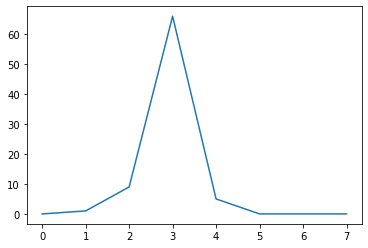

- 2th -


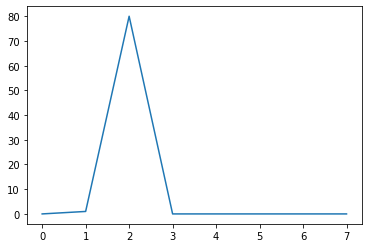

- 3th -


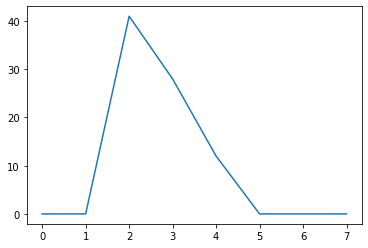

- 4th -


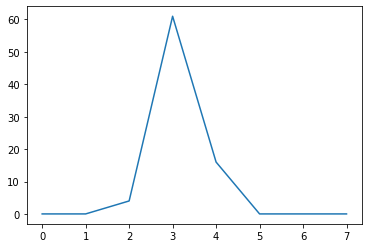

In [35]:
print("*** 1st.jpg ****")
hist_list_1st = gradient_histogram(patch1)

print("*** 2nd.jpg ****")
hist_list_1st = gradient_histogram(patch2)

### (2) Brightness Histogram

## Click and get patch for 1st.jpg
### Get coordinate

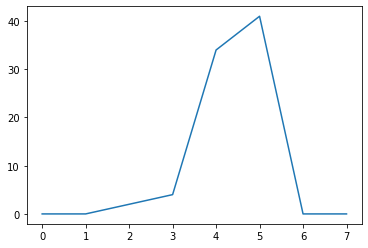

In [22]:
src = cv2.cvtColor(patch1[0], cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([src], [0], None, [int(256/hist_bin)], [0, 256])
plt.plot(hist)
plt.show()


### (3) Color Histogram

In [23]:
print("hello")

hello
